In [14]:
# importing necessary libraries
from urllib.parse import quote_plus
import seaborn as sn
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plot
from sqlalchemy import create_engine,text
from scipy.stats import ttest_ind

In [15]:
user = 'root'
password = quote_plus('Azmath@2024')
host = 'localhost'
port = 3306
database = 'inventory'
url = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(url)
with engine.connect() as conn:
    result = conn.execute(text("SELECT 1"))
    print("Successfully connected:", result.scalar())

Successfully connected: 1


In [22]:
query = "select * from final_summary;"
SF = pd.read_sql(query, engine)
SF.head(10) # only showing first 10 rows for understanding the structure of table

,vendornumber,vendorname,brand,description,purchaseprice,actualprice,volume,totalpurchasedollar,totalpurchasequantity,totalsalesquantity,totalsaledollar,totalecisetax,freigthcost,Gross_Profit,ProfitMargin,stockturnover,salestopurchaseratio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,0.71,1.0,86.0,85.14,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.47,1.0,72.0,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,1.48,2.0,2.0,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,2.34,6.0,134.0,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.64,2.0,5.0,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667
5,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2.84,2.0,14.0,27.86,0.73,257032.07,25.02,89.806174,7.000000,9.809859
6,3960,DIAGEO NORTH AMERICA INC,8729,Smirnoff Light Strawberry,0.74,0.99,50.0,2.96,4.0,6.0,5.94,0.31,257032.07,2.98,50.168350,1.500000,2.006757
7,90024,VINILANDIA USA,46135,Aresti Pnt Nr Curico Vly,3.28,10.99,750.0,3.28,1.0,19.0,94.81,2.12,2802.64,91.53,96.540449,19.000000,28.905488
8,6785,PALM BAY INTERNATIONAL INC,22161,Santa Rita Organic Svgn Bl,3.35,4.99,750.0,3.35,1.0,1.0,9.99,0.11,13605.41,6.64,66.466466,1.000000,2.982090
9,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.37,4.99,750.0,3.37,1.0,1.0,4.99,0.11,144929.24,1.62,32.464930,1.000000,1.480712


In [20]:
SF.describe() #summary statistics

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,vendornumber,brand,purchaseprice,actualprice,volume,totalpurchasedollar,totalpurchasequantity,totalsalesquantity,totalsaledollar,totalecisetax,freigthcost,Gross_Profit,ProfitMargin,stockturnover,salestopurchaseratio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3.010669e+04,3140.886831,3077.482136,4.223907e+04,1774.226259,61433.763214,1.213238e+04,1.664796e+298,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,1.230678e+05,11095.086769,10952.851391,1.676553e+05,10975.582240,60938.458032,4.622434e+04,inf,6.020460,8.459067
min,2.000000,58.000000,0.360000,0.490000,50.000000,7.100000e-01,1.000000,0.000000,0.000000e+00,0.000000,0.090000,-5.200278e+04,-2.373064e+04,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,4.534575e+02,36.000000,33.000000,7.292200e+02,4.800000,14069.870000,5.292000e+01,1.599061e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,3.655465e+03,262.000000,261.000000,5.298045e+03,46.570000,50293.620000,1.399640e+03,3.102703e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,2.073824e+04,1975.750000,1929.250000,2.839692e+04,418.650000,79528.990000,8.660200e+03,4.108606e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,3.811252e+06,337660.000000,334939.000000,5.101920e+06,368242.800000,257032.070000,1.290668e+06,1.000000e+300,274.500000,352.928571


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2913: RuntimeWarning: overflow encountered in dot
  c = dot(X, X_T.conj())


ValueError: array must not contain infs or NaNs

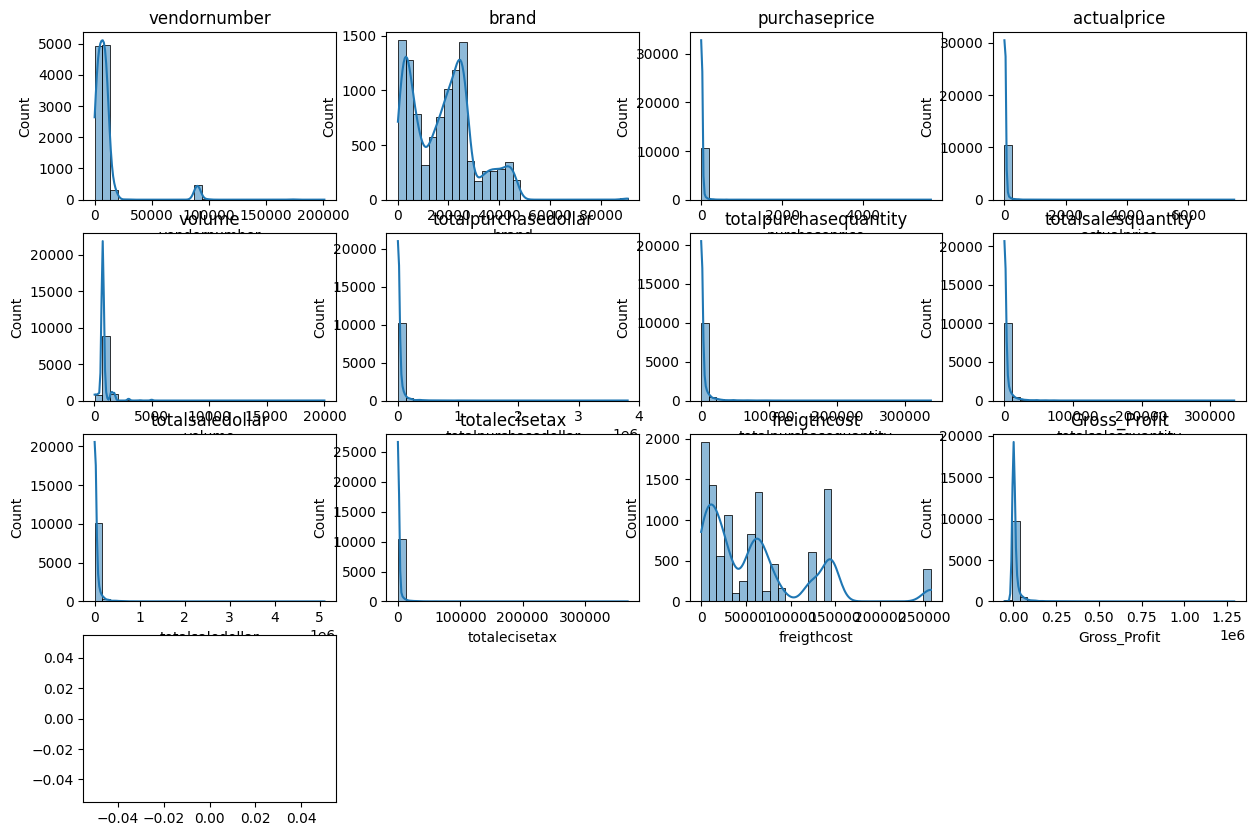

In [23]:
#comparing all the columns data using graphs (histogram Plots)
numerical_col = SF.select_dtypes(include= np.number).columns
plot.figure(figsize=(15,10)) #plot.figure is use to create canvas
for i,col in enumerate(numerical_col):
    plot.subplot(4,4,i+1) #adjust the grid layout
    sn.histplot(SF[col],kde=True,bins=30)
    plot.title(col) #this function write same col name as plot title
plot.tight_layout() # it adjust the spacing b/w plots
plot.show()

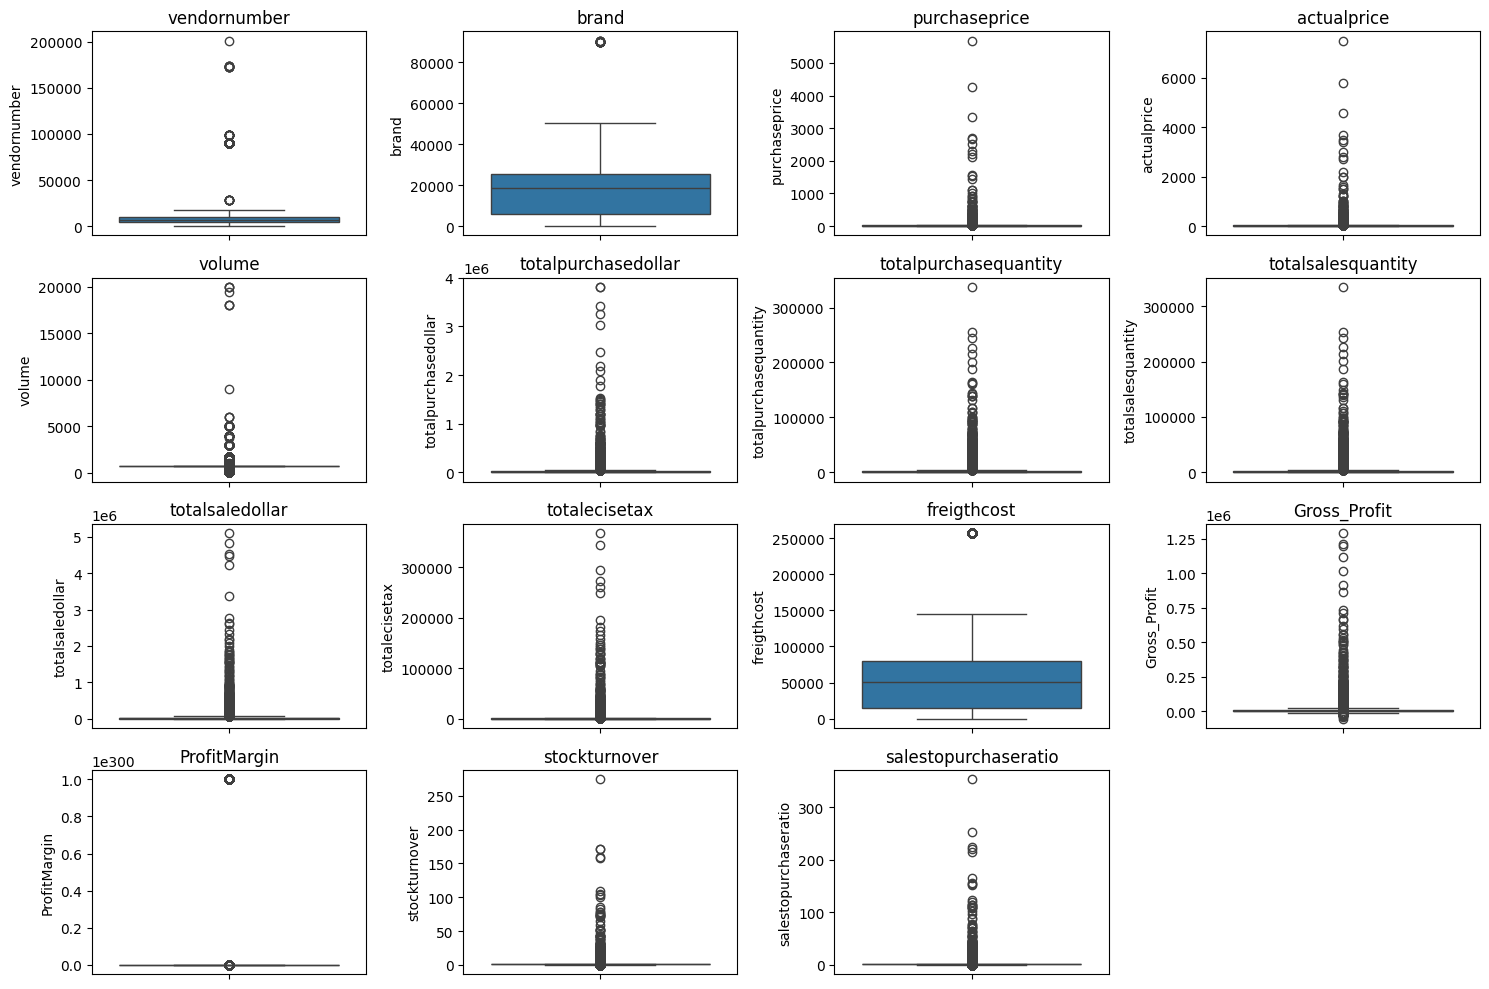

In [24]:
##comparing all the columns data using graphs (box Plots)
plot.figure(figsize=(15,10))
for i,col in enumerate(numerical_col):
    plot.subplot(4,4,i+1) #adjust the grid layout
    sn.boxplot(y=SF[col])
    plot.title(col) #this function write same col name as plot title
plot.tight_layout() # it adjust the spacing b/w plots
plot.show()

# **Summary Statistics Insights:**
**Negative & ZeroValues:**
* Gross Profit:Minimum value is -52,002.79, indicating losses. Some products may  be selling it high cost or selling it in discounts lower  than the purchase price
* Profit_Margin: Minimum value is -$\infty$ Which means the revenue is zero
* Totalsalesquantity & sales dollar : Minimum value is 0, that mean the products were purchase but never sold

**Outliers indicated by High standard deeviation:**
* PurchasePrice & Actual Price : The Max value (5681.81 & 7499.99) are significantly higher than the mean value(24.39 & 35.65),indicating the premium products  
* Stockturnover : Range is 0 to 274.5 which indicates some product are selling fast and some are slow but The value greater than 1 indicates that the sold product quantity more than the purchase quantity due to either solds fullfilled wih old stock 

**Filter outing the data of Grossprofit,profitmargin&totalsalesquantity greater than zero because there is inconsistencies in the data**

If the value zero or less than zero that means the product never sold

In [40]:
query = "select * from final_summary where gross_profit>0 and profitmargin>0 and totalsalesquantity>0;"
sf = pd.read_sql(query, engine)
sf

,vendornumber,vendorname,brand,description,purchaseprice,actualprice,volume,totalpurchasedollar,totalpurchasequantity,totalsalesquantity,totalsaledollar,totalecisetax,freigthcost,Gross_Profit,ProfitMargin,stockturnover,salestopurchaseratio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,0.71,1.0,86.0,8.514000e+01,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.47,1.0,72.0,1.432800e+02,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,1.48,2.0,2.0,1.980000e+00,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,2.34,6.0,134.0,6.566000e+01,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.64,2.0,5.0,1.595000e+01,0.55,27100.41,13.31,83.448276,2.500000,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,3023206.01,138109.0,135838.0,4.223108e+06,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
8561,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,3261197.94,201682.0,200412.0,4.475973e+06,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
8562,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,3418303.68,187407.0,187140.0,4.538121e+06,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
8563,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,3804041.22,164038.0,160247.0,4.819073e+06,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


In [ ]:
sf['description'].count()

np.int64(8565)

In [ ]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
vendornumber,8565.0,10107.041331,17634.685420,2.000000e+00,3664.000000,7153.000000,9552.000000,2.013590e+05
brand,8565.0,17614.046468,12945.503736,5.800000e+01,5376.000000,17601.000000,24935.000000,9.063100e+04
purchaseprice,8565.0,21.779365,81.185007,3.600000e-01,6.660000,10.060000,17.850000,3.352930e+03
actualprice,8565.0,32.295213,112.414374,4.900000e-01,9.990000,14.990000,25.990000,4.559990e+03
volume,8565.0,864.406480,724.230365,5.000000e+01,750.000000,750.000000,750.000000,2.000000e+04
totalpurchasedollar,8565.0,35883.087602,136715.560071,7.100000e-01,545.490000,5017.200000,26600.610000,3.811252e+06
totalpurchasequantity,8565.0,3771.571395,12276.310633,1.000000e+00,42.000000,431.000000,2666.000000,3.376600e+05
totalsalesquantity,8565.0,3748.547577,12125.055208,1.000000e+00,62.000000,490.000000,2675.000000,3.349390e+05
totalsaledollar,8565.0,51536.284564,186061.452634,1.980000e+00,1349.850000,8482.220000,40613.050000,5.101920e+06
totalecisetax,8565.0,2182.553748,12225.226634,1.000000e-01,9.450000,84.760000,594.460000,3.682428e+05


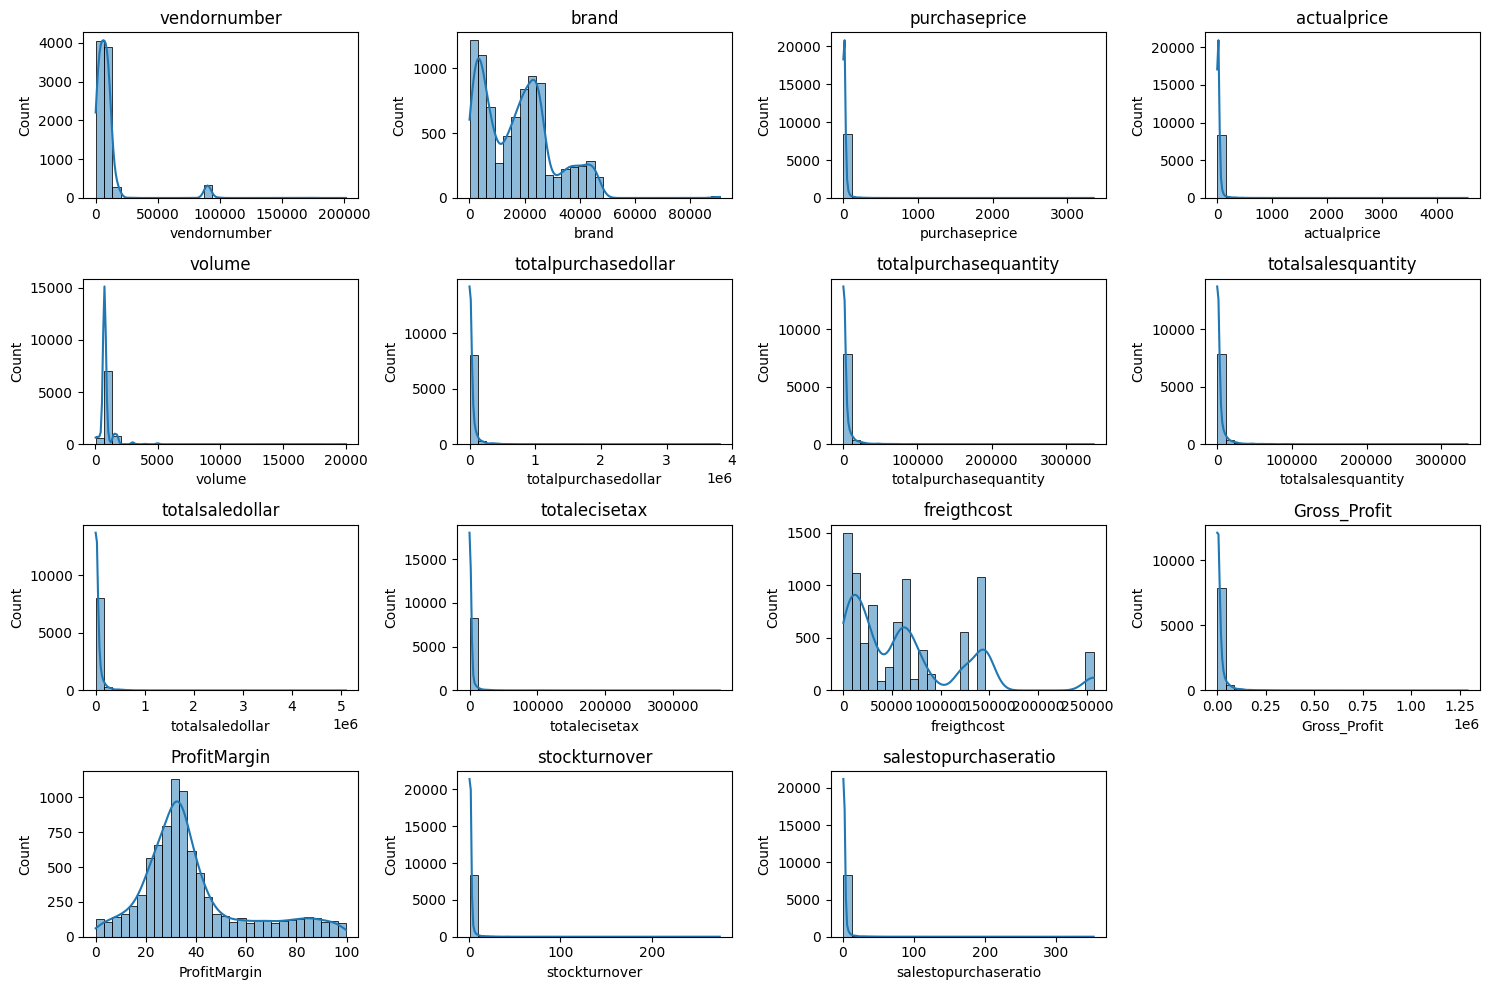

In [41]:
numerical_col = sf.select_dtypes(include = np.number).columns
plot.figure(figsize=(15,10))
for i , col in enumerate(numerical_col):
    plot.subplot(4,4,i+1)
    sn.histplot(sf[col],kde=True,bins=30)
    plot.title(col)
plot.tight_layout()
plot.show()

In [ ]:
sf["description"].value_counts()

description
Southern Comfort                9
Jagermeister Liqueur            7
Bacardi Superior Rum            7
Jim Beam                        6
Southern Comfort 100 Proof      6
                               ..
Black Velvet Canadian Whisky    1
Moet & Chandon Nectar Imp Rs    1
Capt Morgan Original Barrel     1
Kendall Jackson Chard Vt RSV    1
Terruzzi & Puthod Vernaccia     1
Name: count, Length: 7707, dtype: int64

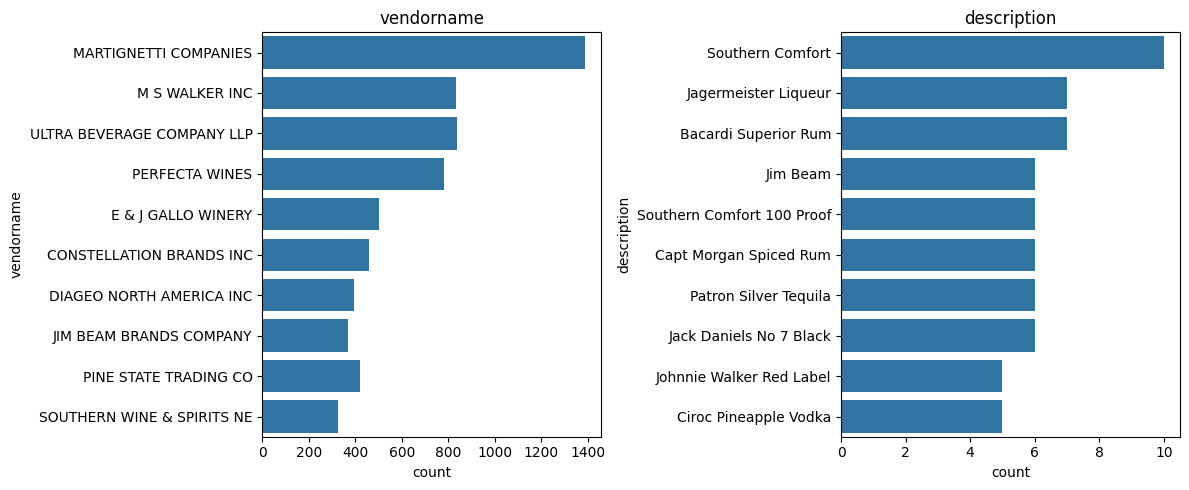

In [ ]:
# Top 10 categories in Vendorname and description
cat_col = ["vendorname","description"]
plot.figure(figsize=(12,5))
for i,col in enumerate(cat_col):
    plot.subplot(1,2,i+1)
    sn.countplot(y=SF[col],order = sf[col].value_counts().index[:10])
    plot.title(col)
plot.tight_layout()
plot.show()

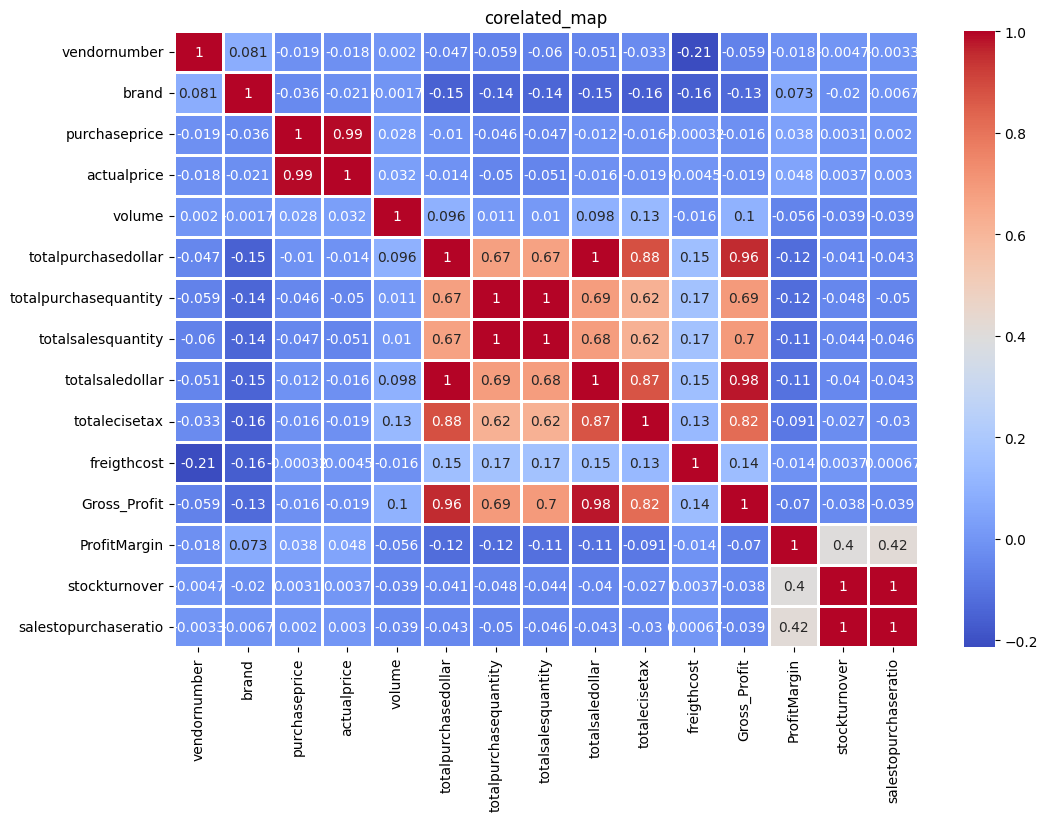

In [42]:
# Correlation Matrix
plot.figure(figsize=(12,8))
corelated_matrix = sf[numerical_col].corr()
sn.heatmap(corelated_matrix,annot=True,cmap="coolwarm",linewidths=1)
plot.title("corelated_map")
plot.show()

# **Correlation Insights**
* PurchasePrice has week relation with totalsaledollar(-0.012) & Grossprofit(-0.16), suggesting that price variations do not significantly impactsales revenue or profit.
* Strongcorrelation between total purchase quantity and total sales quantity(0.999), comfirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
* StockTurnOver  has week negative correlation with both GrossPofit (-0.038) and profit margin(-0.055), indicating that faster turnover does not necessarily result in higher profitability. 

In [ ]:
brand_value = sf.groupby("description").agg({'totalsaledollar' : 'sum','ProfitMargin':'mean'}).reset_index()
brand_value

,description,totalsaledollar,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [ ]:
lower_sales_threshold = brand_value['totalsaledollar'].quantile(0.15)
lower_sales_threshold

np.float64(560.299)

In [ ]:
High_sales_threshold = brand_value['ProfitMargin'].quantile(0.85)
High_sales_threshold

np.float64(64.97017552750111)

In [ ]:
# filter outing the low sales and high profitmargin
target_brands = brand_value[(brand_value['totalsaledollar']<= lower_sales_threshold) & (brand_value['ProfitMargin'] >= High_sales_threshold)]
print("Brands with low sales and high profitmargin")
display(target_brands.sort_values('totalsaledollar'))

Brands with low sales and high profitmargin


,description,totalsaledollar,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


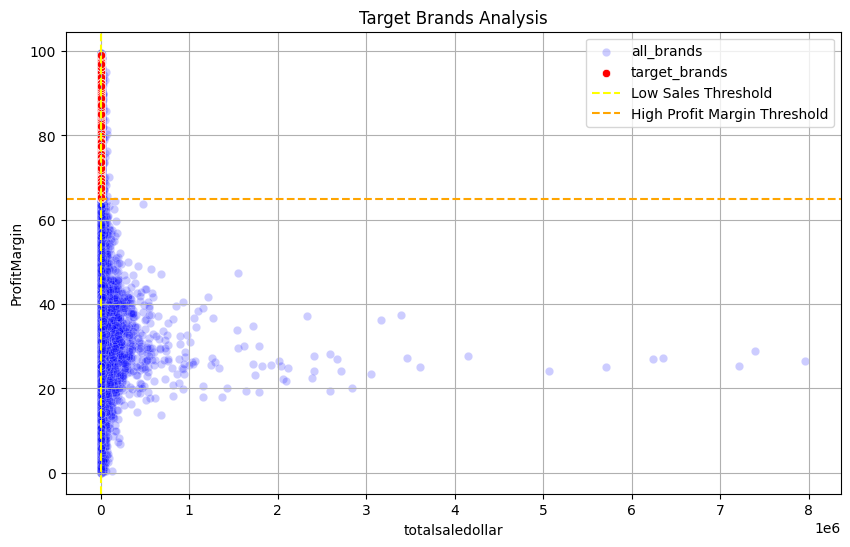

In [ ]:
plot.figure(figsize=(10, 6))
sn.scatterplot(data=brand_value, x='totalsaledollar', y='ProfitMargin',color='blue',label="all_brands",alpha=0.2)
sn.scatterplot(data=target_brands, x='totalsaledollar', y='ProfitMargin',color='red',label="target_brands")
plot.axvline(lower_sales_threshold,color='yellow',linestyle='--',label='Low Sales Threshold')
plot.axhline(High_sales_threshold,color='orange',linestyle='--',label='High Profit Margin Threshold')
plot.title('Target Brands Analysis') #only showing the target brands
plot.legend()
plot.grid(True)
plot.show()

In [ ]:
brand_value = brand_value[brand_value['totalsaledollar']<1000] #removing the outliers

# **Targeting Brands**
Analysing the brands which have High margin and low sales due there high pricing

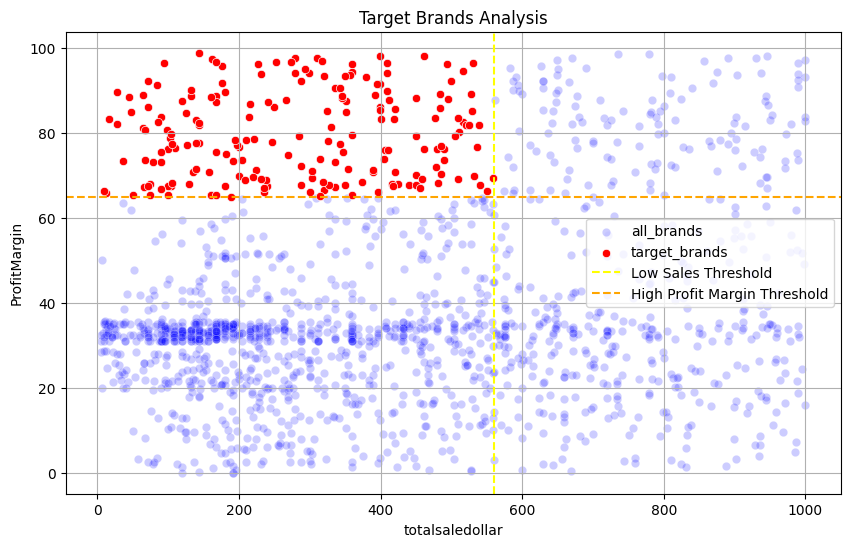

In [ ]:
plot.figure(figsize=(10, 6))
sn.scatterplot(data=brand_value, x='totalsaledollar', y='ProfitMargin',color='blue',label="all_brands",alpha=0.2)
sn.scatterplot(data=target_brands, x='totalsaledollar', y='ProfitMargin',color='red',label="target_brands")
plot.axvline(lower_sales_threshold,color='yellow',linestyle='--',label='Low Sales Threshold')
plot.axhline(High_sales_threshold,color='orange',linestyle='--',label='High Profit Margin Threshold')
plot.title('Target Brands Analysis') #only showing the target brands
plot.legend()
plot.grid(True)
plot.show()


**Red dots in the graph indicating that brands which have to decrease there price's to improve the sales**

In [56]:
#filter formatting currency
def format_currency(value):
    if value >= 1000000:
        return f"${value/1000000:.2f}M"
    elif value >= 1000:
        return f"${value/1000:.2f}K"
    else:
        return f"${value}"

**Here just applying the currency format**

In [ ]:
#filter outing top 10 vendors
top_vendors = sf.groupby('vendorname')['totalsaledollar'].sum().nlargest(10)
top_vendors.apply(lambda x: format_currency(x))

vendorname
DIAGEO NORTH AMERICA INC      $67.99M
MARTIGNETTI COMPANIES         $39.33M
PERNOD RICARD USA             $32.06M
JIM BEAM BRANDS COMPANY       $31.42M
BACARDI USA INC               $24.85M
CONSTELLATION BRANDS INC      $24.22M
E & J GALLO WINERY            $18.40M
BROWN-FORMAN CORP             $18.25M
ULTRA BEVERAGE COMPANY LLP    $16.50M
M S WALKER INC                $14.71M
Name: totalsaledollar, dtype: object

In [ ]:
#filter outing the top 10 brands
top_brands = sf.groupby('description')['totalsaledollar'].sum().nlargest(10)
top_brands.apply(lambda x: format_currency(x))

description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: totalsaledollar, dtype: object

**Analysing the Top 10 categories of Vender and Brands by there Total sales**

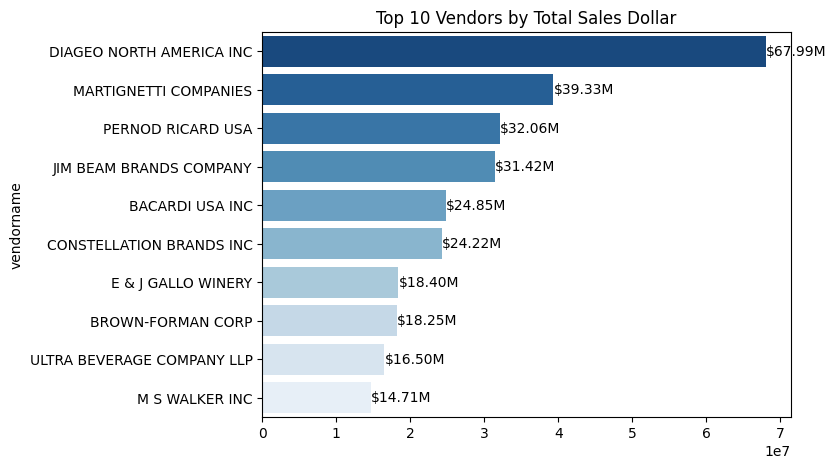

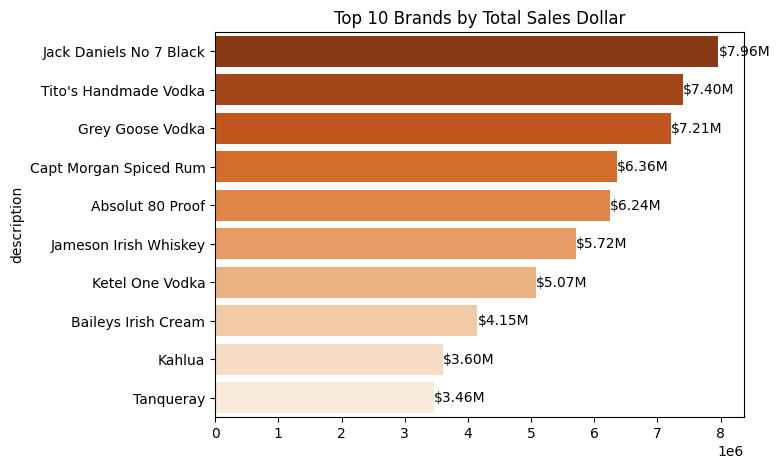

In [ ]:
# filter bar plot for top 10 vendors
plot.figure(figsize=(15, 5))
plot.subplot(1,2,1)
ax1 = sn.barplot(x=top_vendors.values,y=top_vendors.index,palette='Blues_r',hue=top_vendors.index)
plot.title('Top 10 Vendors by Total Sales Dollar')
for bar in ax1.patches:
    ax1.annotate(format_currency(bar.get_width()), 
                 (bar.get_width(),
                   bar.get_y() + bar.get_height() / 2),
                     ha='left', va='center')
# filter bar plot for top 10 Brands
plot.figure(figsize=(15, 5))
plot.subplot(1,2,2)
ax2 = sn.barplot(x=top_brands.values,y=top_brands.index,palette='Oranges_r',hue=top_brands.index)
plot.title('Top 10 Brands by Total Sales Dollar')
for bar in ax2.patches:
    ax2.annotate(format_currency(bar.get_width()), 
                 (bar.get_width(),
                   bar.get_y() + bar.get_height() / 2),
                     ha='left', va='center')



In [ ]:
# each vendor performance
vendors_performance = sf.groupby('vendorname').agg({'totalpurchasedollar':'sum','Gross_Profit':'sum','totalsaledollar':'sum'}).reset_index()
vendors_performance

,vendorname,totalpurchasedollar,Gross_Profit,totalsaledollar
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [ ]:

vendors_performance['Contribution_Margin_of_purchase'] = (vendors_performance['totalpurchasedollar'] / vendors_performance['totalpurchasedollar'].sum())*100
vendors_performance

,vendorname,totalpurchasedollar,Gross_Profit,totalsaledollar,Contribution_Margin_of_purchase
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008361
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912073
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693182


**Contribution margin of each Vendor**

In [ ]:
vendors_performance = round(vendors_performance.sort_values(by='Contribution_Margin_of_purchase',ascending=False), 2)
vendors_performance


,vendorname,totalpurchasedollar,Gross_Profit,totalsaledollar,Contribution_Margin_of_purchase
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [ ]:
#top 10 vendors performance
top_vendors_performance = vendors_performance.head(10)
top_vendors_performance['totalpurchasedollar'] = top_vendors_performance['totalpurchasedollar'].apply(format_currency)
top_vendors_performance['Gross_Profit'] = top_vendors_performance['Gross_Profit'].apply(format_currency)
top_vendors_performance['totalsaledollar'] = top_vendors_performance['totalsaledollar'].apply(format_currency)
top_vendors_performance

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15352\3564444048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors_performance['totalpurchasedollar'] = top_vendors_performance['totalpurchasedollar'].apply(format_currency)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15352\3564444048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors_performance['Gross_Profit'] = top_vendors_performance['Gross_Profit'].apply(format_currency)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15352\356444404

,vendorname,totalpurchasedollar,Gross_Profit,totalsaledollar,Contribution_Margin_of_purchase
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18


In [ ]:
top_vendors_performance['Contribution_Margin_of_purchase'].sum() # only top 10 companies are contributing more than 65%


np.float64(65.69000000000001)

In [ ]:
# calculating cumulative percentage of contribution_margin_of_purchase
top_vendors_performance['cumulative_margin_performance'] = top_vendors_performance['Contribution_Margin_of_purchase'].cumsum()
top_vendors_performance

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15352\499482627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors_performance['cumulative_margin_performance'] = top_vendors_performance['Contribution_Margin_of_purchase'].cumsum()


,vendorname,totalpurchasedollar,Gross_Profit,totalsaledollar,Contribution_Margin_of_purchase,cumulative_margin_performance
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30,24.60
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64,40.00
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97,50.64
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31,54.95
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63,62.51
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18,65.69


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15352\1468044752.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendors_performance['vendorname'],rotation = 90)


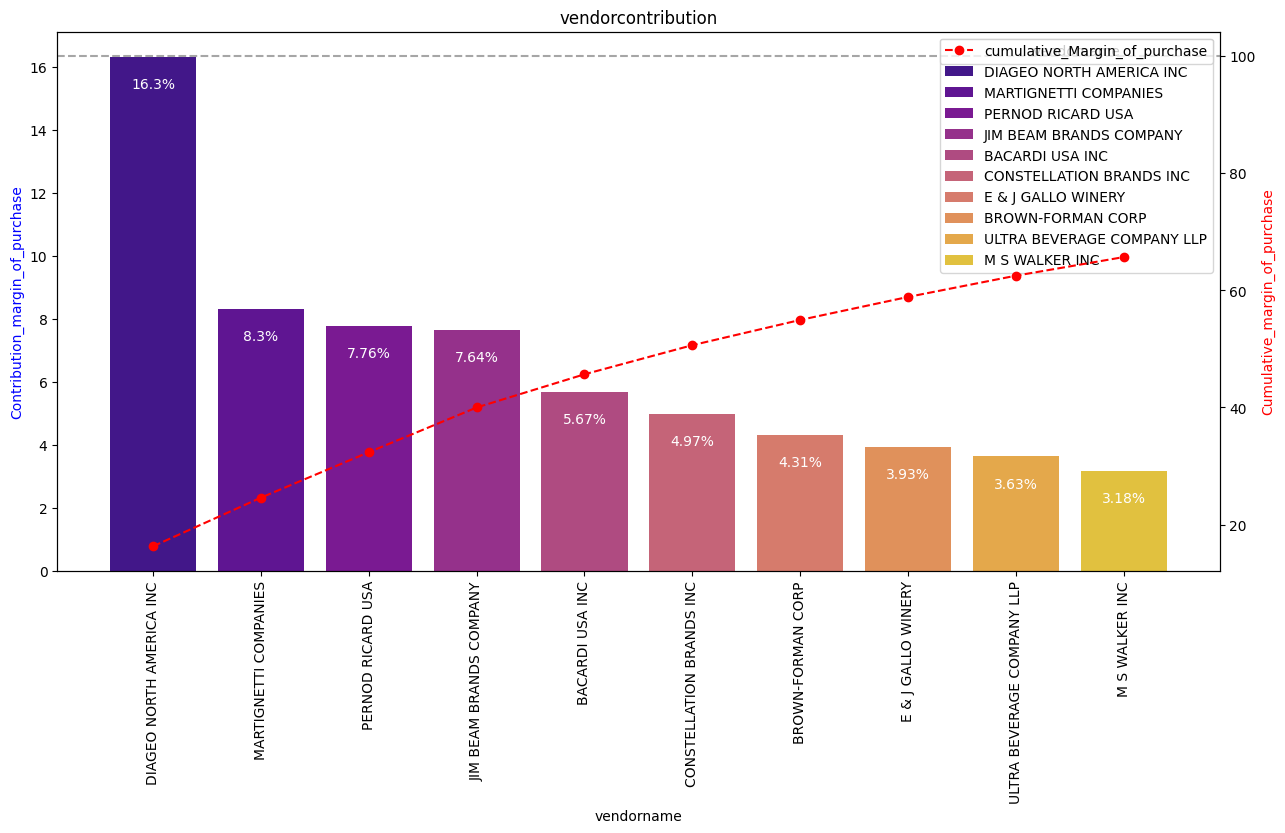

In [ ]:
fig,ax1=plot.subplots(figsize=(15,7))
sn.barplot(x=top_vendors_performance['vendorname'],y=top_vendors_performance['Contribution_Margin_of_purchase'],palette='plasma',ax=ax1,hue=top_vendors.index)
for i,value in enumerate(top_vendors_performance['Contribution_Margin_of_purchase']):
    ax1.text(i,value-1,str(value)+"%",ha = "center",fontsize=10,color="white")
ax2 = ax1.twinx()
ax2.plot(top_vendors_performance['vendorname'],top_vendors_performance['cumulative_margin_performance'],color = 'red',marker = "o",linestyle="dashed",label="cumulative_Margin_of_purchase")
ax1.set_xticklabels(top_vendors_performance['vendorname'],rotation = 90)
ax1.set_ylabel('Contribution_margin_of_purchase',color = 'blue')
ax2.set_ylabel('Cumulative_margin_of_purchase',color = 'red')
ax2.set_xlabel('vendorname')
ax1.set_title('vendorcontribution')
ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc = "upper right")
plot.show()

Text(0.5, 1.0, 'Vendor Contribution Distribution')

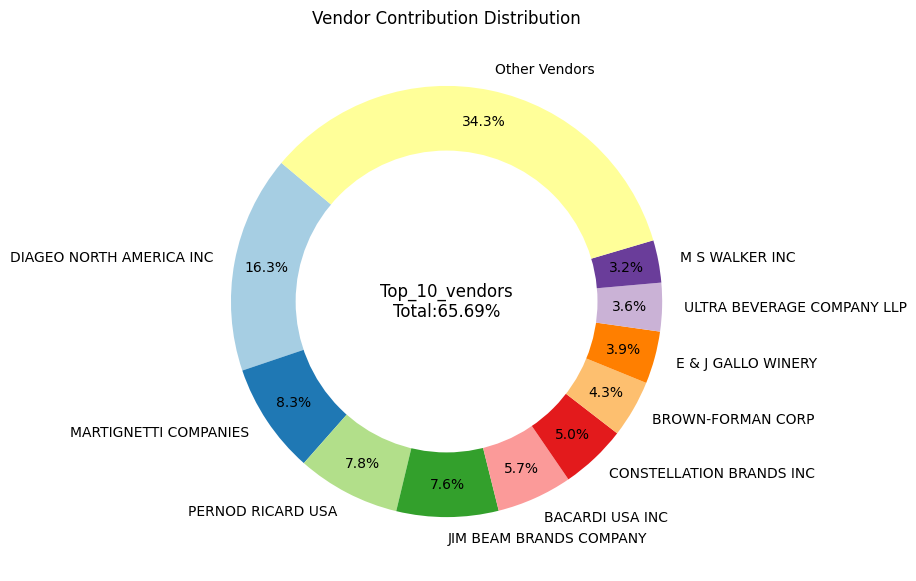

In [ ]:
vendors = list(top_vendors_performance['vendorname'].values)
purchase = list(top_vendors_performance['Contribution_Margin_of_purchase'].values)
total_contribution  = sum(purchase)
remaining_contribution = 100 - total_contribution

vendors.append('Other Vendors')
purchase.append(remaining_contribution)

fig,ax = plot.subplots(figsize=(10,7))
wedge,text,autotext = ax.pie(purchase,labels=vendors,autopct='%1.1f%%',startangle=140,pctdistance=0.85,colors=plot.cm.Paired.colors)

centre_circle = plot.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plot.text(0,0,f"Top_10_vendors\nTotal:{total_contribution:.2f}%", horizontalalignment='center', verticalalignment='center', fontsize=12)
plot.title('Vendor Contribution Distribution')

**Here we can understand that Top 10 holding 65% from totalsales**

In [45]:
# Finding the optimal purchase price on purchase quantity (if purchase quantity is more, purchase price should be less)
sf['Unitpurchaseprice'] = sf['totalpurchasedollar'] / sf['totalpurchasequantity'] # price per each unit
sf['ordersize'] = pd.qcut(sf['totalpurchasequantity'], q=3, labels=['Small', 'Medium', 'Large'])
sf.groupby('ordersize')['Unitpurchaseprice'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7520\3884930233.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sf.groupby('ordersize')['Unitpurchaseprice'].mean()


ordersize
Small     39.057543
Medium    15.486414
Large     10.777625
Name: Unitpurchaseprice, dtype: float64

**Analysing that if ordered Bulk in quantity there will get big discount**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15352\1664311427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x='ordersize',y='Unitpurchaseprice',data=sf,palette='Set2')


Text(0, 0.5, 'Unit Purchase Price')

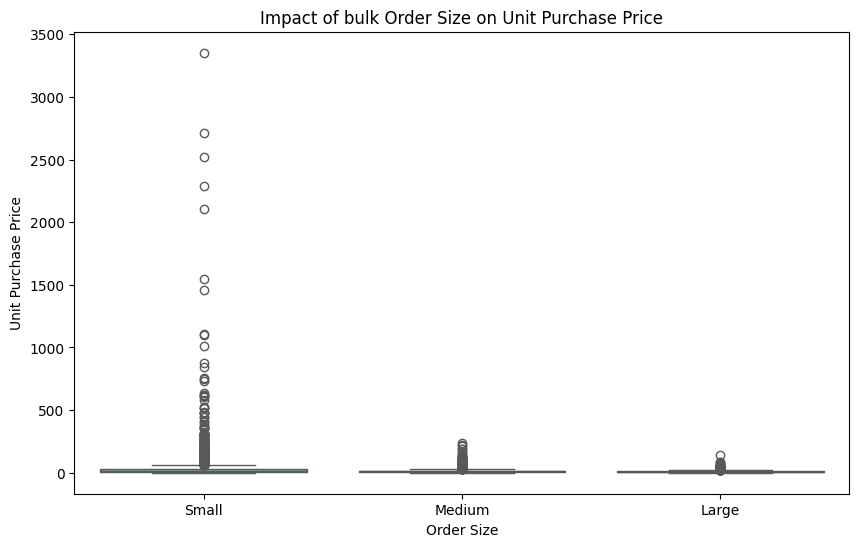

In [ ]:
plot.figure(figsize=(10,6))
sn.boxplot(x='ordersize',y='Unitpurchaseprice',data=sf,palette='Set2')
plot.title('Impact of bulk Order Size on Unit Purchase Price')
plot.xlabel('Order Size')
plot.ylabel('Unit Purchase Price')      

* Vendors buying in Bulk amount get low unit price (~10.9 per unit),which means higher margin if there manage inventory efficiently.
* The price difference small order and large order (~72% reduced in unit cost)
* This suggest that bulk orders strategies encourage the vendors

In [57]:
# Revenue of unsold inventory of all vendors
sf['unsoldInventory'] = (sf['totalpurchasequantity'] - sf['totalsalesquantity'])*sf['Unitpurchaseprice']
a = sf[sf['unsoldInventory'] > 0]['unsoldInventory'].sum()
a = np.float64(a)
a = format_currency(a)
a

'$9.55M'

In [ ]:
# inventory actual value to sell at market price 
sf['UnitSalesPrice'] = sf['totalsaledollar'] / sf['totalsalesquantity']
sf['markekpriceofunsoldinventory'] = (sf['totalpurchasequantity'] - sf['totalsalesquantity'])*sf['UnitSalesPrice']
b = sf[sf['markekpriceofunsoldinventory'] > 0]['markekpriceofunsoldinventory'].sum()
b = np.float64(b)
b = format_currency(b)
b


'$13.94M'

* There 9.6 million dollar inventory left unsold from all vendors
* Market value of unsold inventory is 13.95 million dollar that means there is signicificant amountof differnce (~4.35 million differnce)
* To remove old stock from inventory We can allows the discount (Allowing this discount based on the calculations of transport,margin etc..)

**How much capital locked in unsold inventory per vendor and which vendor contributes most?**

In [63]:
# inventory value per vendor
inventory_value_per_vendor = sf[sf['unsoldInventory'] > 0].groupby('vendorname')['unsoldInventory'].sum().sort_values(ascending=False).reset_index()
inventory_value_per_vendor['unsoldInventory'] = inventory_value_per_vendor['unsoldInventory'].apply(lambda x: format_currency(x)) 
inventory_value_per_vendor.head(10)

,vendorname,unsoldInventory
0,DIAGEO NORTH AMERICA INC,$1.40M
1,MARTIGNETTI COMPANIES,$882.51K
2,JIM BEAM BRANDS COMPANY,$833.26K
3,PERNOD RICARD USA,$638.98K
4,ULTRA BEVERAGE COMPANY LLP,$506.53K
5,WILLIAM GRANT & SONS INC,$468.09K
6,E & J GALLO WINERY,$399.97K
7,CONSTELLATION BRANDS INC,$346.40K
8,PERFECTA WINES,$344.63K
9,BROWN-FORMAN CORP,$337.28K


**What is the 95% confidence intervals for profitmargin of top performing and low performing vendors**

In [ ]:
#performance of top vendors and low vendors
top_threshold = sf['totalsaledollar'].quantile(0.75)
low_threshold = sf['totalsaledollar'].quantile(0.25)
top_performance = sf[sf['totalsaledollar'] >= top_threshold]["ProfitMargin"].dropna()
top_performance


3514    94.271857
3644    95.012530
3813    93.085860
4883    85.782102
5041    79.684817
          ...    
8560    28.412764
8561    27.139908
8562    24.675786
8563    21.062810
8564    25.297693
Name: ProfitMargin, Length: 2142, dtype: float64

In [ ]:
low_threshold = sf['totalsaledollar'].quantile(0.25)
low_performance = sf[sf['totalsaledollar'] <= low_threshold]["ProfitMargin"].dropna()
low_performance

0       99.166079
1       98.974037
2       25.252525
3       96.436186
4       83.448276
          ...    
2840     7.239599
2860     1.677308
2863    12.007271
2912     6.145626
2933     4.111764
Name: ProfitMargin, Length: 2142, dtype: float64

In [ ]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    h = std_err * 1.96  # for 95% confidence
    return mean, mean - h, mean + h

Top Performance - Mean: 31.17, 95% CI: (30.74, 31.61)
Low Performance - Mean: 41.55, 95% CI: (40.48, 42.62)


Text(0, 0.5, 'Frequency')

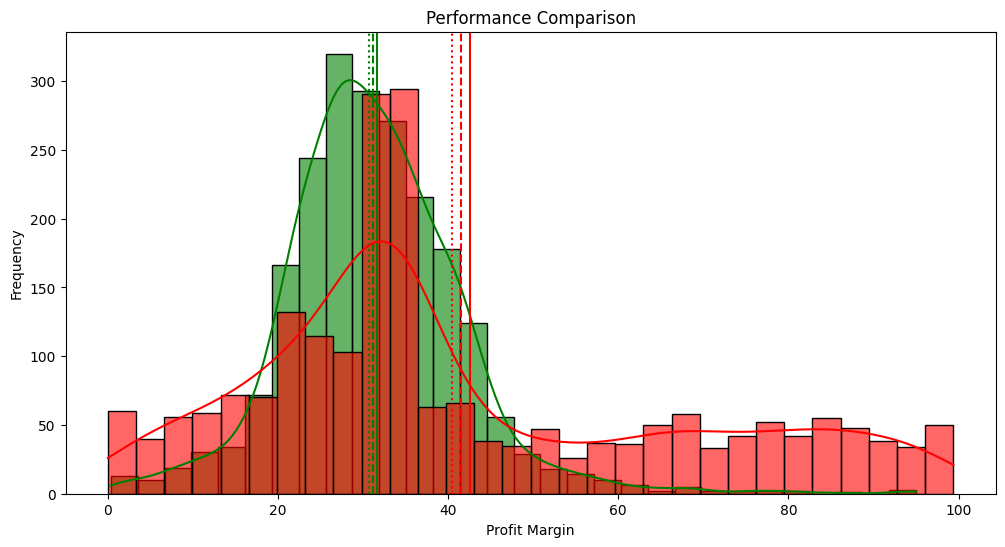

In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_performance)
low_mean, low_lower, low_upper = confidence_interval(low_performance)
print(f"Top Performance - Mean: {top_mean:.2f}, 95% CI: ({top_lower:.2f}, {top_upper:.2f})")
print(f"Low Performance - Mean: {low_mean:.2f}, 95% CI: ({low_lower:.2f}, {low_upper:.2f})")
plot.figure(figsize=(12,6))
sn.histplot(top_performance, kde=True, color='green',bins=30,alpha=0.6,label='Top Performance')
plot.axvline(top_mean, color='green', linestyle='--', label='Top Mean')
plot.axvline(top_lower, color='green', linestyle=':', label='Top Lower CI')
plot.axvline(top_upper, color='green', linestyle='-', label='Top Upper CI')
sn.histplot(low_performance, kde=True, color='red',bins=30,alpha = 0.6,label='Low Performance')
plot.axvline(low_mean, color='red', linestyle='--', label='Low Mean')
plot.axvline(low_lower, color='red', linestyle=':', label='Low Lower CI')
plot.axvline(low_upper, color='red', linestyle='-', label='Low Upper CI')
plot.title('Performance Comparison')
plot.xlabel('Profit Margin')
plot.ylabel('Frequency')

* The confidence interval for low performing vendors (40.48% to 42.62%) is significantly higher than top performing vendors (30.74% to 31.61%)
* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing.
* For High-performing vendors: If they aim to improve profitability, they could explore selective price adjustment,cost optimization.
* For Low-performing vendors: Despite higher margins,their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies. 

**Is there a significant difference in profit margins between top-performing vendors ?**

Hypothesis:

(Null hypothesis): There is no significant different in the mean profit margins of top-performing and low-performing

(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different

In [ ]:
t_stats,p_value = ttest_ind(top_performance, low_performance, equal_var=False)
print(f"T-statistic: {t_stats:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between top and low performance groups.")     
else:
    print("Fail to reject the null hypothesis: No significant difference between top and low performance groups.")

T-statistic: -17.64, P-value: 0.0000
Reject the null hypothesis: Significant difference between top and low performance groups.
